This notebook gives some example for calculating the magnetic fields and gradients using the Functions defined in field.py

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import fields as f
import fields_plot as fp
import nv_optical_response as nv
import nv_analysis as nv_anal

# from b26_toolkit.src.data_analyis import nv_optical_properties as nv

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib 
# setup font styles for figures
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.weight' : 'normal'}
matplotlib.rcParams.update(params)

# widget for progess
from ipywidgets import FloatProgress
from IPython.display import display

from mpl_toolkits.axes_grid1 import make_axes_locatable

## Info

to get infos about the functions, call help:

In [2]:
?f.calc_B_field_single_dipole #  this code 
?f.gradient #  general code that allows to have multiple dipoles and multiple positions

## define the general parameters

In [2]:
#     a: radius in um
#     Br: surface magnetization in Teslas
#     phi_m: polar angle in deg / phi = 0 and theta = 90 along x
#     theta_m: azimuthal angle in deg
#     d_bead_z: distance top of bead to NV plane
#     mu_0: vacuum permeability ( T m /A)
#     d_bead_z: distance between bead and z plane
#     dx: distance between points (in um)
#     x_min, x_max, y_min, y_max: plot dimensions (in um)

p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.4 ,
    'phi_m' : 90,
    'theta_m' : 90,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':3
}

# f.p_2

## plot total magnetic field - single dipole

/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  C = C.reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:26: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X = data['x'].reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:27: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Y = data['y'].reshape(Ny, Nx)
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this w

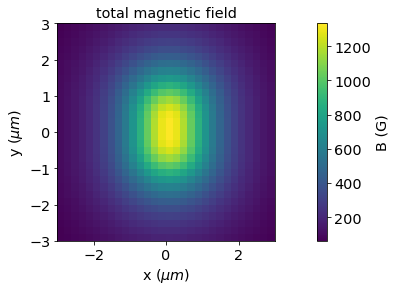

In [3]:
data = f.calc_B_field_single_dipole(p)
fig = fp.plot_Bfield_mag(data, title ='total magnetic field')

# save figure
# fig.savefig('data/'+f.p_to_filename(p) + 'total_field.png')

## gradient along single NV

/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:71: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X = data['x'].reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:72: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Y = data['y'].reshape(Ny, Nx)
/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


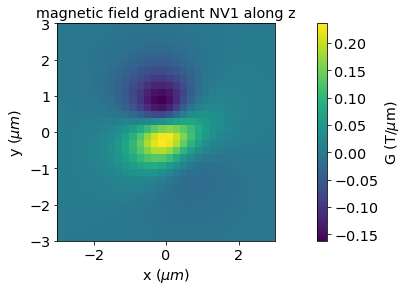

In [4]:

nv_id =1 # select a NV [1,2,3,4]
# for nv_id in [1,2,3, 4]:

s= nv.nNV[nv_id-1] # NV orientation 
n = [0,0,1] # direction of gradient

data = f.calc_Gradient_single_dipole(p, s, n)
fig = fp.plot_G(data, title ='magnetic field gradient NV{:0d} along z'.format(nv_id))

# plot fields on a ring

In [5]:

p = {
    'a' : 1.4,
    'Br' : 0.31666357,
    'muo' : 4 * np.pi * 1e-7,
}

dz = 0 # distane between diamond and magnet in um
radius_nvs = 3.2 # radius of NV measurements in um
DipolePosition = np.array([0,0,0])
phi_m = 15 # angle of magnetic dipole
theta_m = 89 # angle of magnetic dipole
2630008

m = f.magnetic_moment(**p)*np.array([np.cos(phi_m*np.pi/180)*np.sin(theta_m*np.pi/180),
                                     np.sin(phi_m*np.pi/180)*np.sin(theta_m*np.pi/180),
                                    np.cos(theta_m*np.pi/180)])



phi = np.linspace(0, 2*np.pi, 50)
zo = p['a']+dz
# calculate the positions
x = radius_nvs*np.cos(phi)
y = radius_nvs*np.sin(phi)
# Nx, Ny = len(x), len(y)
# X, Y = np.meshgrid(x, y)

r = np.array([x, y, zo * np.ones(len(x))]).T

B = f.b_field_single_dipole(r, DipolePosition, m)

Text(0,0.5,'total field (mT)')

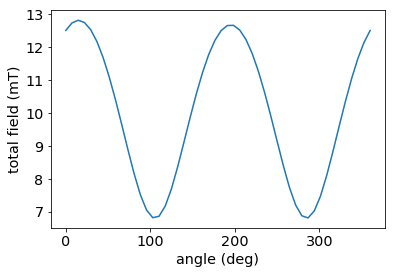

In [6]:
plt.plot(phi*180/np.pi, 1e3*np.linalg.norm(B,axis=1))
plt.xlabel('angle (deg)')
plt.ylabel('total field (mT)')

## optimize the gradient along z while keeping the xy gradient low - dipole along y

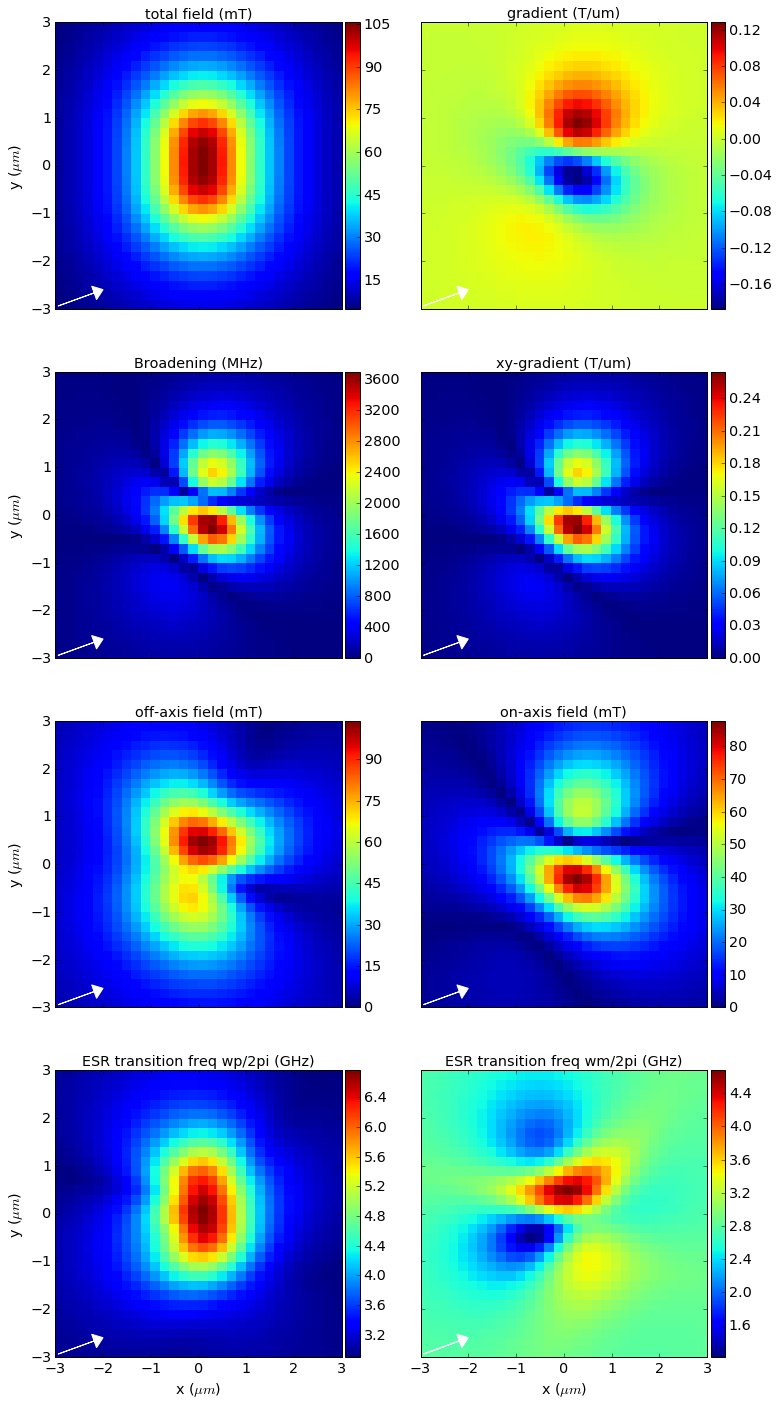

In [2]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 90,
    'theta_m' : 90,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':3
}


nv_id = 0
n = [0,0,1]

max_broadening = 100 # in MHz
max_off_axis_field = 0.01 # in Teslas
df = nv_anal.get_full_nv_dataset(p, nv_id=nv_id, n=n)

# plot_types = ['Bmag', 'G', 'shift', 'Bperp', 'Bpar', 'fp', 'fm']
plot_types = ['Bmag', 'G', 'shift', 'Gxy', 'Bperp', 'Bpar', 'fp', 'fm']
rows = int(np.ceil(len(plot_types)/2.))

fig, axis = plt.subplots(rows, 2, sharex=True, sharey=True, figsize = (12, 24))

for plot_type, ax in zip(plot_types, np.reshape(axis, 2*rows)[0:len(plot_types)]):
#     x, fig = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field,
#                                       plot=True, plot_prop=plot_type)
    ax = fp.plot_NV_property_map(df, prop = plot_type, ax=ax)
    x = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field)
    
    fp.plot_arrow(x, ax)
    
# remove labels
for j in range(len(axis)-1):
    for i in [0,1]:
        axis[j,i].set_xlabel('')

for i in range(len(axis)):
    axis[i,1].set_ylabel('')

## optimize the gradient along z while keeping the xy gradient low - dipole along z

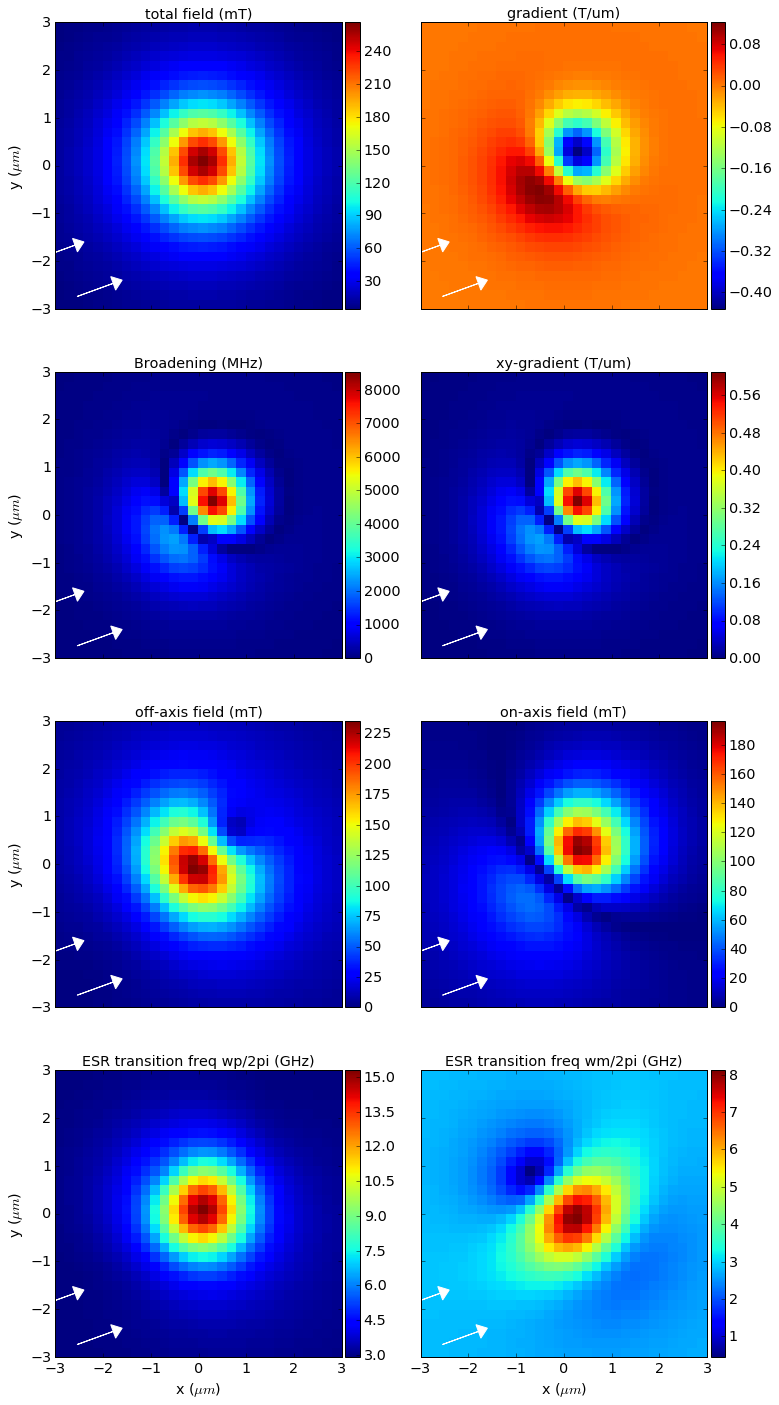

In [3]:

p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.4 ,
    'phi_m' : 90,
    'theta_m' : 180,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':3
}


nv_id = 0
n = [0,0,1]

max_broadening = 100 # in MHz
max_off_axis_field = 0.01 # in Teslas
df = nv_anal.get_full_nv_dataset(p, nv_id=nv_id, n=n)

# plot_types = ['Bmag', 'G', 'shift', 'Bperp', 'Bpar', 'fp', 'fm']
plot_types = ['Bmag', 'G', 'shift', 'Gxy', 'Bperp', 'Bpar', 'fp', 'fm']
rows = int(np.ceil(len(plot_types)/2.))

fig, axis = plt.subplots(rows, 2, sharex=True, sharey=True, figsize = (12, 24))

for plot_type, ax in zip(plot_types, np.reshape(axis, 2*rows)[0:len(plot_types)]):
#     x, fig = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field,
#                                       plot=True, plot_prop=plot_type)
    ax = fp.plot_NV_property_map(df, prop = plot_type, ax=ax)
    x = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field)
    
    fp.plot_arrow(x, ax)
    
# remove labels
for j in range(len(axis)-1):
    for i in [0,1]:
        axis[j,i].set_xlabel('')

for i in range(len(axis)):
    axis[i,1].set_ylabel('')

## optimize the gradient along z while keeping the xy gradient low - dipole along y -rotate NV

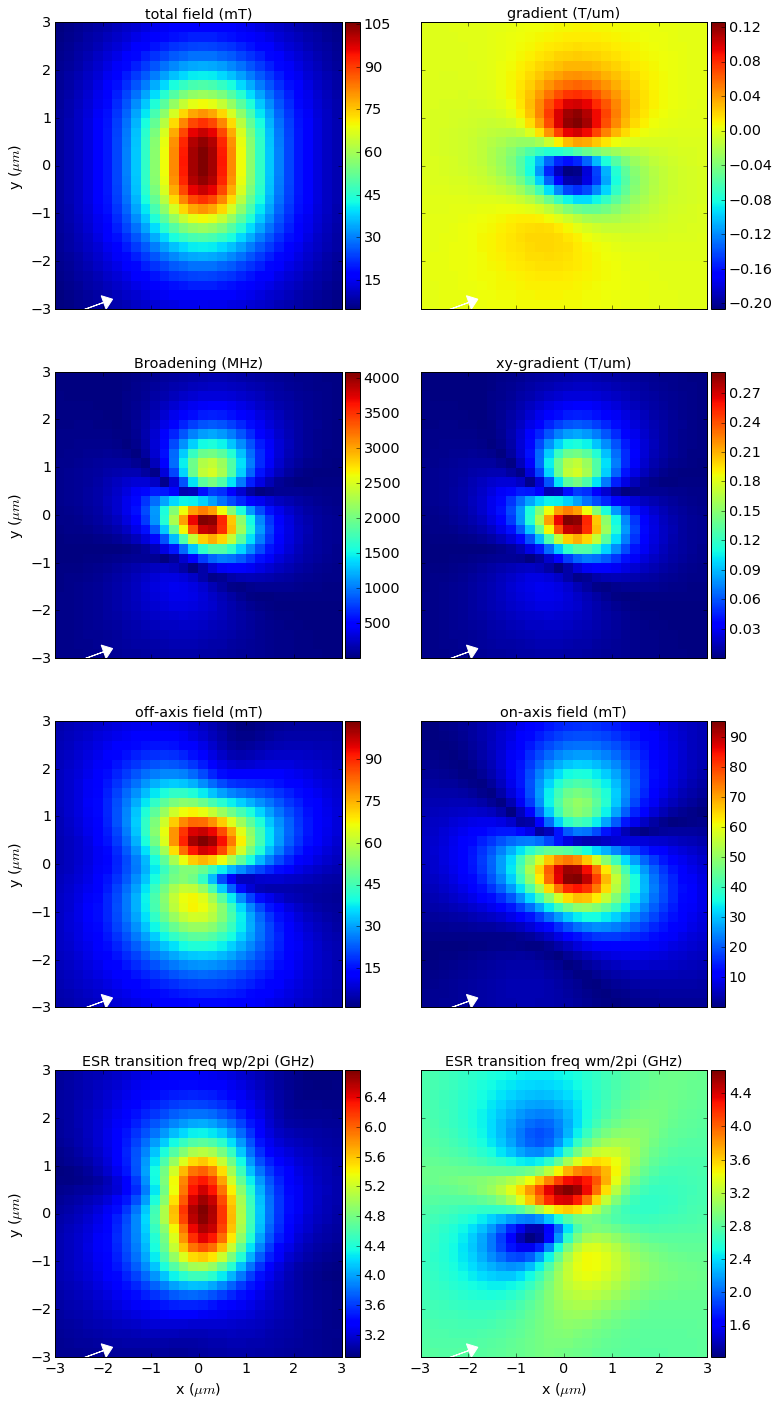

In [4]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 90,
    'theta_m' : 90,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':3
}


nv_id = 0
n = [0,0,1]

nv_rot = 15.27564388 # rotation of diamond in deg

nv_rot = nv_anal.rotation_matrix_z(nv_rot)

max_broadening = 100 # in MHz
max_off_axis_field = 0.01 # in Teslas
df = nv_anal.get_full_nv_dataset(p, nv_id=nv_id, nv_rotation_matrix = nv_rot, n=n)

# plot_types = ['Bmag', 'G', 'shift', 'Bperp', 'Bpar', 'fp', 'fm']
plot_types = ['Bmag', 'G', 'shift', 'Gxy', 'Bperp', 'Bpar', 'fp', 'fm']
rows = int(np.ceil(len(plot_types)/2.))

fig, axis = plt.subplots(rows, 2, sharex=True, sharey=True, figsize = (12, 24))

for plot_type, ax in zip(plot_types, np.reshape(axis, 2*rows)[0:len(plot_types)]):
#     x, fig = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field,
#                                       plot=True, plot_prop=plot_type)
    ax = fp.plot_NV_property_map(df, prop = plot_type, ax=ax)
    x = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field)
    
    fp.plot_arrow(x, ax)
    
# remove labels
for j in range(len(axis)-1):
    for i in [0,1]:
        axis[j,i].set_xlabel('')

for i in range(len(axis)):
    axis[i,1].set_ylabel('')

# magnetize along a nv axis

NV parallel to magnet!


,G,x,y,z,Gxy,Broadening,Bpar,Bperp,Bmag,fm,fp
699,0.053205,0.4,1.4,1.4,0.075243,1053.401565,0.054441,0.003898,0.054581,3.329059e+09,4.294382e+09


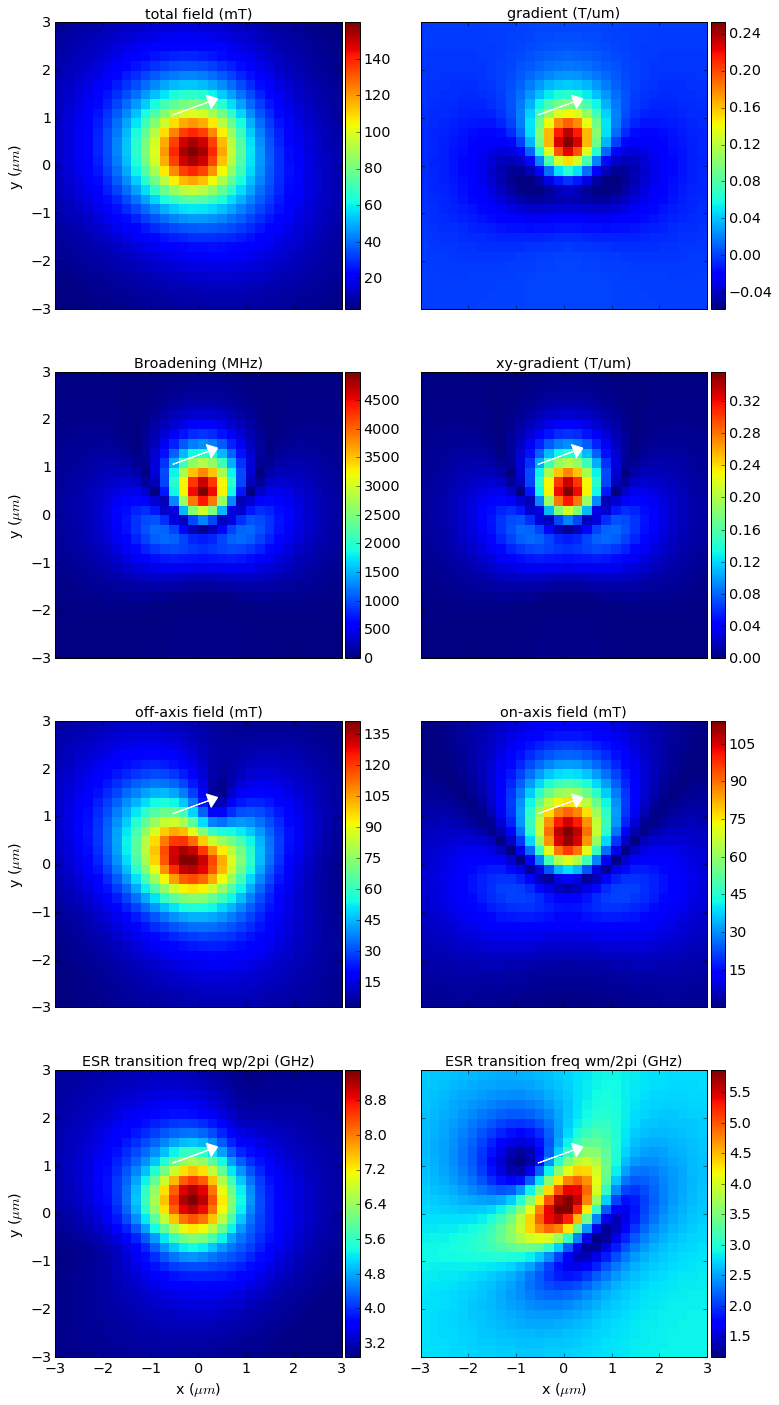

In [12]:

p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : -45,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':3
}


nv_id = 0
n = [0,0,1]

nv_rot = 0 # rotation of diamond in deg

nv_rot = nv_anal.rotation_matrix_z(nv_rot)

max_broadening = 100000000 # in MHz
max_off_axis_field = 0.005 # in Teslas


# === begin script =======

# check that magnet is parallel to nv 
r, m = f.p_to_positions(p)
m/=np.linalg.norm(m)
s = nv.nNV[nv_id]
if np.linalg.norm(np.cross(s, m))>1e-15:
    print('Warning NV not parallel to magnet')
else:
    print('NV parallel to magnet!')

df = nv_anal.get_full_nv_dataset(p, nv_id=nv_id, nv_rotation_matrix = nv_rot, n=n)

# plot_types = ['Bmag', 'G', 'shift', 'Bperp', 'Bpar', 'fp', 'fm']
plot_types = ['Bmag', 'G', 'shift', 'Gxy', 'Bperp', 'Bpar', 'fp', 'fm']
rows = int(np.ceil(len(plot_types)/2.))

fig, axis = plt.subplots(rows, 2, sharex=True, sharey=True, figsize = (12, 24))

for plot_type, ax in zip(plot_types, np.reshape(axis, 2*rows)[0:len(plot_types)]):
#     x, fig = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field,
#                                       plot=True, plot_prop=plot_type)
    ax = fp.plot_NV_property_map(df, prop = plot_type, ax=ax)
    x = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field)
    
    fp.plot_arrow(x, ax)
    
# remove labels
for j in range(len(axis)-1):
    for i in [0,1]:
        axis[j,i].set_xlabel('')

for i in range(len(axis)):
    axis[i,1].set_ylabel('')
x

In [10]:
nv.esr_frequencies( np.array([0.065569,0,  0.009381]))

array([  3.71204487e+09,   4.71932964e+09])

In [11]:
nv.esr_frequencies( np.array([0, 0.065569,  0.009381]))

array([  3.71204487e+09,   4.71932964e+09])

# find the optimal angle

In [7]:
def plot_gradient_map(theta_mag, phi_diamond, G, ax):

    fig = ax.get_figure()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)

    im = ax.pcolormesh(theta_mag, phi_diamond, G)

    fig.colorbar(im, cax=cax, orientation='vertical')

    ax.set_xlim(np.min(theta_mag), np.max(theta_mag))
    ax.set_ylim(np.min(phi_diamond), np.max(phi_diamond))

    ax.set_xlabel('theta (deg)')
    ax.set_ylabel('phi (deg)')
    ax.set_title('NV{:d} gradient (T/um)'.format(nv_id))


    nv_angle_theta = np.arctan2(np.sqrt(nv.nNV[nv_id][0]**2+nv.nNV[nv_id][1]**2),nv.nNV[nv_id][2])*180/np.pi
    nv_angle_phi = np.arctan2(nv.nNV[nv_id][0], nv.nNV[nv_id][1])*180/np.pi
    nv_angle_phi = nv_angle_phi+360 if nv_angle_phi<0 else nv_angle_phi
    ax.plot([nv_angle_theta, nv_angle_theta], [np.min(phi_diamond), np.max(phi_diamond)], '--w', lw = 3)
    ax.plot([np.min(theta_mag), np.max(theta_mag)], [nv_angle_phi, nv_angle_phi], '--w', lw = 3)
    # ax.set_aspect('equal')
    # ax.set_aspect(0.5)
    return ax

## NVs in 100 (standard) diamond 

A Jupyter Widget

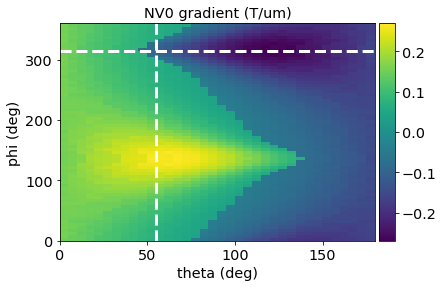

In [ ]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.05,
    'xmax':2
}


nv_id = 0
n = [0,0,1]

max_broadening = 100000 # in MHz
max_off_axis_field = 0.01 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

for nv_id in range(1):
    # define progress bar
    f = FloatProgress(min=0, max=len(theta_mag)*len(phi_diamond), description = 'calculating gradients NV{:d}...'.format(nv_id))
    display(f)
    # preallocate gradient array
    G = np.zeros([len(phi_diamond), len(theta_mag)])
    for r, phid in enumerate(phi_diamond):
        for c, tm in enumerate(theta_mag):
            G[r, c] = nv_anal.calc_max_gradient(p, nv_id, n, max_broadening, max_off_axis_field, phid, tm)
            f.value += 1 # update progress
    #print('done!')
    df = pd.DataFrame(G)
    df.to_csv('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT.csv'.format(nv_id, max_off_axis_field*1e3))
    f.description ='data saved!'
    fig, ax = plt.subplots()
    ax = plot_gradient_map(theta_mag, phi_diamond, G, ax)
    fig.savefig('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT.jpg'.format(nv_id, max_off_axis_field*1e3))
    f.description = 'figure saved!'

### don't redo calculation but just load previous data

In [ ]:
df = pd.read_csv('images/gradient_maps_vary_angles_NV{:d}.csv'.format(nv_id))
theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg
fig, ax = plt.subplots()

ax = plot_gradient_map(theta_mag, phi_diamond, G, ax)

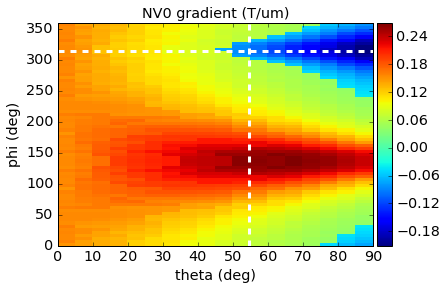

In [26]:
# fig, ax = plt.subplots(2, 2)
fig, ax = plt.subplots()


fig = ax.get_figure()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.pcolormesh(theta_mag, phi_diamond, G)

fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_xlim(np.min(theta_mag), np.max(theta_mag))
ax.set_ylim(np.min(phi_diamond), np.max(phi_diamond))

ax.set_xlabel('theta (deg)')
ax.set_ylabel('phi (deg)')
ax.set_title('NV{:d} gradient (T/um)'.format(nv_id))


nv_angle_theta = np.arctan2(np.sqrt(nv.nNV[nv_id][0]**2+nv.nNV[nv_id][1]**2),nv.nNV[nv_id][2])*180/np.pi
nv_angle_phi = np.arctan2(nv.nNV[nv_id][0], nv.nNV[nv_id][1])*180/np.pi
nv_angle_phi = nv_angle_phi+360 if nv_angle_phi<0 else nv_angle_phi
ax.plot([nv_angle_theta, nv_angle_theta], [np.min(phi_diamond), np.max(phi_diamond)], '--w', lw = 3)
ax.plot([np.min(theta_mag), np.max(theta_mag)], [nv_angle_phi, nv_angle_phi], '--w', lw = 3)
# ax.set_aspect('equal')
# ax.set_aspect(0.5)
fig.savefig('images/gradient_maps_vary_angles_NV{:d}.jpg'.format(nv_id))

#### single NV - max off axis field 5mT

In [ ]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.05,
    'xmax':2
}


nv_id = 0
n = [0,0,1]

max_broadening = 100000 # in MHz
max_off_axis_field = 5e-3 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

for nv_id in range(1):
    # define progress bar
    f = FloatProgress(min=0, max=len(theta_mag)*len(phi_diamond), description = 'calculating gradients NV{:d}...'.format(nv_id))
    display(f)
    # preallocate gradient array
    G = np.zeros([len(phi_diamond), len(theta_mag)])
    for r, phid in enumerate(phi_diamond):
        for c, tm in enumerate(theta_mag):
            G[r, c] = nv_anal.calc_max_gradient(p, nv_id, n, max_broadening, max_off_axis_field, phid, tm)
            f.value += 1 # update progress
    #print('done!')
    df = pd.DataFrame(G)
    df.to_csv('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT.csv'.format(nv_id, max_off_axis_field*1e3))
    f.description ='data saved!'
    fig, ax = plt.subplots()
    ax = plot_gradient_map(theta_mag, phi_diamond, G, ax)
    fig.savefig('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT.jpg'.format(nv_id, max_off_axis_field*1e3))
    f.description = 'figure saved!'

A Jupyter Widget

## Ensemble

#### ensemble NV - max off axis field 5mT, max broadening 50MHz

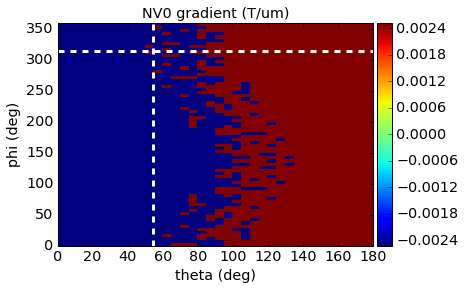

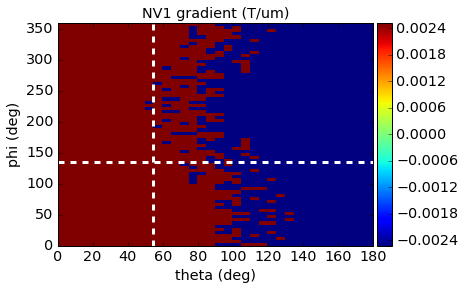

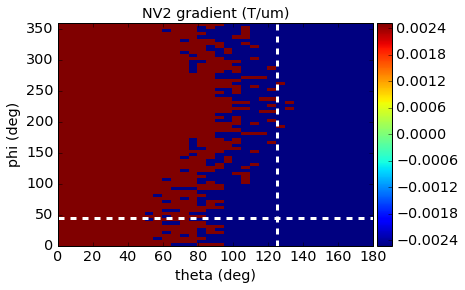

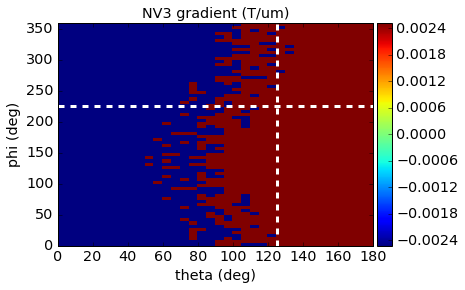

In [52]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.05,
    'xmax':5
}


nv_id = 0
n = [0,0,1]

max_broadening = 50 # in MHz
max_off_axis_field = 5e-3 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

for nv_id in range(1):
    # define progress bar
    f = FloatProgress(min=0, max=len(theta_mag)*len(phi_diamond), description = 'calculating gradients NV{:d}...'.format(nv_id))
    display(f)
    # preallocate gradient array
    G = np.zeros([len(phi_diamond), len(theta_mag)])
    for r, phid in enumerate(phi_diamond):
        for c, tm in enumerate(theta_mag):
            G[r, c] = nv_anal.calc_max_gradient(p, nv_id, n, max_broadening, max_off_axis_field, phid, tm)
            f.value += 1 # update progress
    #print('done!')
    df = pd.DataFrame(G)
    df.to_csv('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT_maxBroad_{:03.0f}MHz.csv'.format(nv_id, max_off_axis_field*1e3, max_broadening))
    f.description ='data saved!'
    fig, ax = plt.subplots()
    ax = plot_gradient_map(theta_mag, phi_diamond, G, ax)
    fig.savefig('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT_maxBroad_{:03.0f}MHz.jpg'.format(nv_id, max_off_axis_field*1e3, max_broadening))
    f.description = 'figure saved!'

## NVs in 111 (hard to get) diamond 

#### single NV - max off axis field 5mT

In [ ]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.05,
    'xmax':2
}


nv_id = 0
n = [0,0,1]

max_broadening = 100000 # in MHz
max_off_axis_field = 0.01 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

for nv_id in range(1):
    # define progress bar
    f = FloatProgress(min=0, max=len(theta_mag)*len(phi_diamond), description = 'calculating gradients NV{:d}...'.format(nv_id))
    display(f)
    # preallocate gradient array
    G = np.zeros([len(phi_diamond), len(theta_mag)])
    for r, phid in enumerate(phi_diamond):
        for c, tm in enumerate(theta_mag):
            G[r, c] = nv_anal.calc_max_gradient(p, nv_id, n, max_broadening, max_off_axis_field, phid, tm, diamond111_nv_id = 0)
            f.value += 1 # update progress
    #print('done!')
    df = pd.DataFrame(G)
    df.to_csv('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT_111type.csv'.format(nv_id, max_off_axis_field*1e3))
    f.description ='data saved!'
    fig, ax = plt.subplots()
    ax = plot_gradient_map(theta_mag, phi_diamond, G, ax)
    fig.savefig('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT_111type.jpg'.format(nv_id, max_off_axis_field*1e3))
    f.description = 'figure saved!'

### plot in a 3D plot - not really used

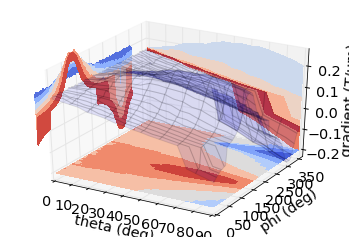

In [67]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(theta_mag, phi_diamond)

# Plot the 3D surface
ax.plot_surface(X, Y, G, rstride=2, cstride=2, alpha=0.1)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
# cset = ax.contourf(X, Y, G, zdir='z', offset=-100, cmap=cm.coolwarm)
# cset = ax.contourf(X, Y, G, zdir='x', offset=-40, cmap=cm.coolwarm)
# cset = ax.contourf(X, Y, G, zdir='y', offset=40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, G, zdir='z', offset=-0.2, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, G, zdir='x', offset=-10, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, G, zdir='y', offset=360, cmap=cm.coolwarm)


ax.set_xlim(np.min(X), np.max(X))
ax.set_ylim(np.min(Y), np.max(Y))
ax.set_zlim(np.min(G), np.max(G))

ax.set_xlabel('theta (deg)')
ax.set_ylabel('phi (deg)')
ax.set_zlabel('gradient (T/um)')

plt.show()

# detailed look at specific angles

In [40]:

def plot_for_certain_angles(theta_magnet, phi_diamond, p, nv_id, n, max_broadening, max_off_axis_field):
    p2= p
    p2['theta_m'] = theta_magnet

    nv_rot = nv_anal.rotation_matrix_z(phi_diamond)

    df = nv_anal.get_full_nv_dataset(p2, nv_id=nv_id, n=n, nv_rotation_matrix = nv_rot)


    # plot_types = ['Bmag', 'G', 'shift', 'Bperp', 'Bpar', 'fp', 'fm']
    plot_types = ['Bmag', 'G', 'Bperp', 'Bpar', 'fp', 'fm']
    rows = int(np.ceil(len(plot_types)/2.))

    fig, axis = plt.subplots(rows, 2, sharex=True, sharey=True, figsize = (12, 18))

    for plot_type, ax in zip(plot_types, np.reshape(axis, 2*rows)[0:len(plot_types)]):
    #     x, fig = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field,
    #                                       plot=True, plot_prop=plot_type)
        ax = fp.plot_NV_property_map(df, prop = plot_type, ax=ax)
        x = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field)

        fp.plot_arrow(x, ax)

    # remove labels
    for j in range(len(axis)-1):
        for i in [0,1]:
            axis[j,i].set_xlabel('')

    for i in range(len(axis)):
        axis[i,1].set_ylabel('')
        
    return x

In [49]:

def plot_for_certain_angles(theta_magnet, phi_diamond, p, nv_id, n, max_broadening, max_off_axis_field):
    p2= p
    p2['theta_m'] = theta_magnet

    nv_rot = nv_anal.rotation_matrix_z(phi_diamond)

    df = nv_anal.get_full_nv_dataset(p2, nv_id=nv_id, n=n, nv_rotation_matrix = nv_rot)


    # plot_types = ['Bmag', 'G', 'shift', 'Bperp', 'Bpar', 'fp', 'fm']
    plot_types = ['Bmag', 'Bperp', 'fp', 'G', 'Bpar', 'fm']
    rows = int(np.ceil(len(plot_types)/2.))

    fig, axis = plt.subplots(2, rows, sharex=True, sharey=True, figsize = (18, 10))

    for plot_type, ax in zip(plot_types, np.reshape(axis, 2*rows)[0:len(plot_types)]):
    #     x, fig = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field,
    #                                       plot=True, plot_prop=plot_type)
        ax = fp.plot_NV_property_map(df, prop = plot_type, ax=ax)
        x = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field)

        fp.plot_arrow(x, ax)

    # remove labels
    for j in range(len(axis)-1):
        for i in [0,1,2]:
            axis[j,i].set_xlabel('')

    for i in range(len(axis)):
        for j in [1,2]:
            axis[i,j].set_ylabel('')
        
    return x, fig

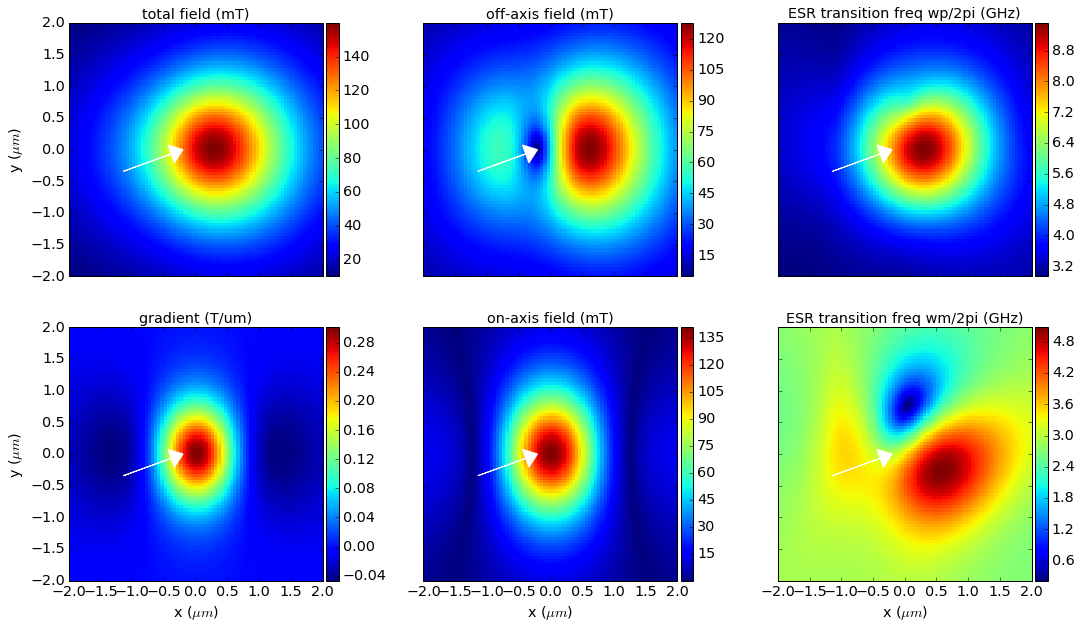

In [50]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.05,
    'xmax':2
}


nv_id = 0
n = [0,0,1]

max_broadening = 100000 # in MHz
max_off_axis_field = 0.01 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

theta_magnet = 54.7
phi_diamond = 135
x, fig = plot_for_certain_angles(theta_magnet, phi_diamond, p, nv_id, n, max_broadening, max_off_axis_field)
x
fig.savefig('images/optimal_gradient_maps_NV{:d}.jpg'.format(nv_id))

In [15]:
nv_angle_theta

(100, 0.01)

## gradient in x-y plane for single NV

In [102]:
# nv_id =1 # select a NV [1,2,3,4]

# s= nv.nNV[nv_id-1] # NV orientation 

# # calculate gradent along x
# n = [1,0,0] # direction of gradient
# datax = f.calc_Gradient_single_dipole(p, s, n)
# # calculate gradent along y
# n = [0,1,0] # direction of gradient
# datay = f.calc_Gradient_single_dipole(p, s, n)

# dataz = f.calc_Gradient_single_dipole(p, s, n)

# # now calculate the avrg gradient in xy divided by the gradient in z
# data = datax
# data['G'] = np.sqrt(datax['G']**2+datay['G']**2)/dataz['G']
# fig = fp.plot_G(data, title ='magnetic field gradient NV{:0d} in xy plane'.format(nv_id))

# more complicated things, e.g. calculate fields and gradients for 2 dipoles

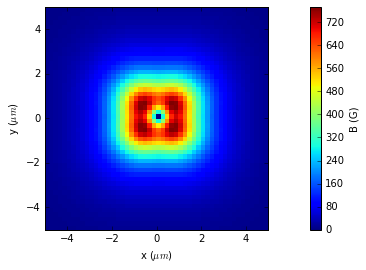

In [8]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.4 ,
    'phi_m' : 90,
    'theta_m' : 90,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':5
}

s= nv.nNV[nv_id-1] # NV orientation 

# calculate gradent along x
n = [1,0,0] # direction of gradient



# ====== begin ========

# get the positions for which to calculate the field and the magnetic moment
r, M = f.p_to_positions(p)

# two dipoles at x=1 and x=-1 and y=z=0
DipolePositions = np.array([
      [-0.5,0,0],[0.5,0,0]
    ])
# M = np.ones([len(DipolePositions),1])*M
M = np.array([M, -M])

data = f.b_field(r, DipolePositions, M)

fig = fp.plot_Bfield_mag(data)

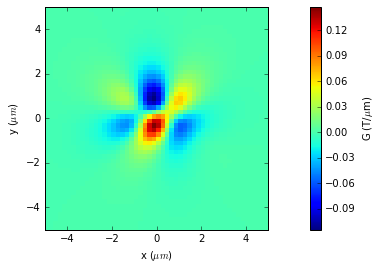

In [9]:
data = f.gradient(r, DipolePositions, M, s, n)

fig = fp.plot_G(data)